## Working on ExperimentLoader

In [1]:
import sys, json, os
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

PROJECT_DIR = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER"
SRC_DIR = str(Path(PROJECT_DIR) / "src")
if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)

from multiomic_transformer.models.model import MultiomicTransformer
from multiomic_transformer.datasets.dataset_refactor import MultiChromosomeDataset, SimpleScaler, fit_simple_scalers
import multiomic_transformer.utils.experiment_loader as experiment_loader

In [133]:
from importlib import reload

reload(experiment_loader)

<module 'multiomic_transformer.utils.experiment_loader' from '/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/src/multiomic_transformer/utils/experiment_loader.py'>

In [132]:
exp = experiment_loader.ExperimentLoader(
    experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
    experiment_name="Macrophage_buffer_2_best_settings",
    model_num=1,
)

exp.load_trained_model("trained_model.pt")

In [28]:
for k, v in exp.model_training_params.items():
    print(f"{k}: {v}")

allowed_samples: None
epochs: 250
batch_size: 16
grad_accum_steps: 1
use_grad_accum: True
use_grad_ckpt: True
d_model: 192
num_heads: 4
num_layers: 3
d_ff: 768
dropout: 0.1
use_shortcut: False
use_dist_bias: True
use_motif_mask: True
motif_mask_threshold: 0.0
motif_prior_scale: 0.0
shortcut_l1: 0.0
shortcut_l2: 0.0
shortcut_dropout: 0.0
shortcut_topk: None
lr: 0.00025
genes: 11340
windows: 69548
tfs: 985
metacells: 46139


Running forward pass to get predicted vs true TG expression for a subset of test batches...


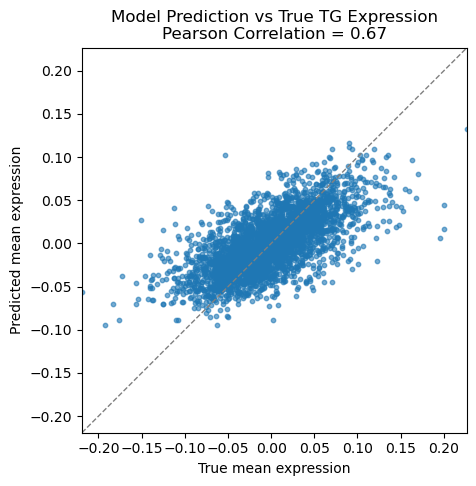

In [3]:
fig = exp.plot_true_vs_predicted_tg_expression(num_batches=25, rerun_forward_pass=True)
fig.show()

In [15]:
x = exp.tg_prediction_df.mean(axis=1).values
y = exp.tg_true_df.mean(axis=1).values

x = np.nan_to_num(x, nan=0.0, posinf=1e6, neginf=-1e6)
y = np.nan_to_num(y, nan=0.0, posinf=1e6, neginf=-1e6)

print("True min:", x.min())
print("Pred min:", y.min())


True min: -0.14524744
Pred min: -0.10361299


In [6]:
exp.tg_true_df.head()

,batch0_cell0,batch0_cell1,batch0_cell2,batch0_cell3,batch0_cell4,batch0_cell5,batch0_cell6,batch0_cell7,batch1_cell0,batch1_cell1,...,batch8_cell6,batch8_cell7,batch9_cell0,batch9_cell1,batch9_cell2,batch9_cell3,batch9_cell4,batch9_cell5,batch9_cell6,batch9_cell7
ADAMTSL4-AS1,-0.000097,0.004709,0.021687,0.003430,0.000102,0.027045,0.026824,0.020496,0.007051,-0.001036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIPOR1,0.028828,0.005022,0.031483,0.012031,0.026649,0.036869,0.032276,0.029841,0.007219,0.023069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIDA,0.006035,-0.011320,-0.003087,-0.004260,0.005849,0.006528,-0.002676,-0.004745,-0.012780,0.004109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKT3,0.045411,0.043276,0.054056,0.042629,0.042895,0.061609,0.052700,0.054424,0.044904,0.043627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALDH4A1,0.002424,-0.004741,0.007337,-0.004679,0.003589,-0.004545,0.006344,0.008269,-0.003189,0.002739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


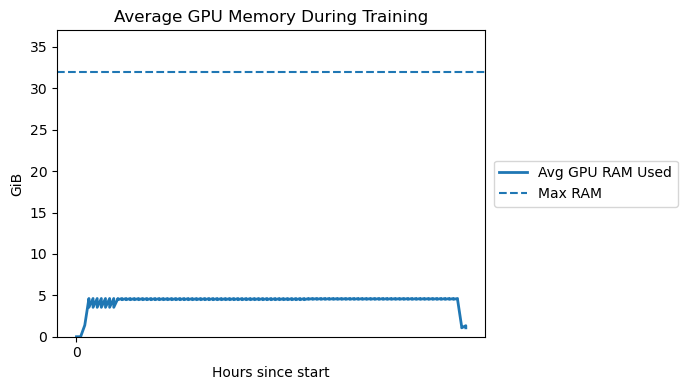

In [ ]:
fig = exp.plot_gpu_usage()
fig.show()

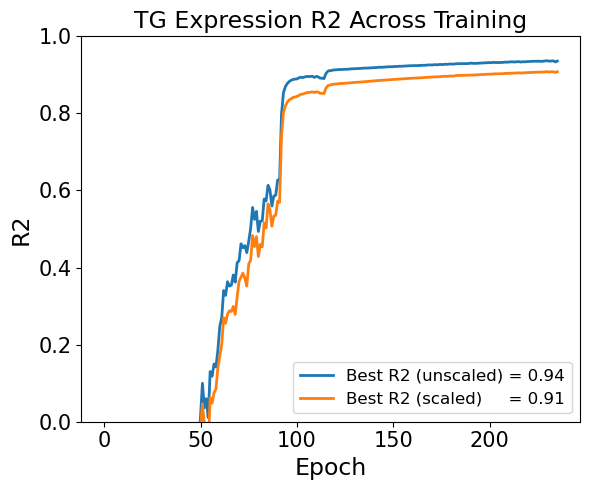

In [ ]:
fig = exp.plot_train_correlation()
fig.show()

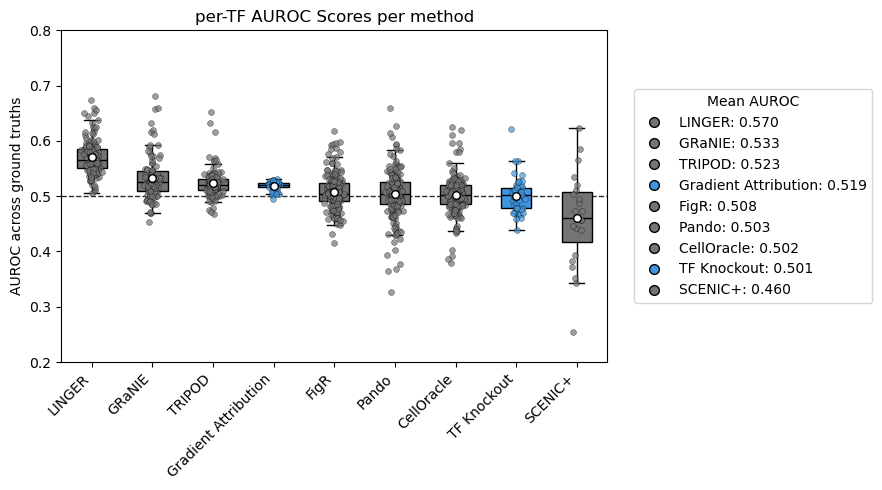

In [ ]:
fig = exp.plot_per_tf_auroc_boxplot(agg_by_gt=False, ylim=(0.2, 0.8))
fig.show()

In [ ]:
experiment_settings = exp.experiment_settings_df
experiment_settings

,parameter,value
0,EXPERIMENT_NAME,E8.5_rep1_hvg_filter_disp_0.2
1,DATASET_NAME,mESC_E8.5_rep1_hvg_filter_disp_0.2
2,ORGANISM_CODE,mm10
3,SAMPLE_NAMES,E8.5_rep1
4,VALIDATION_DATASETS,NaN
...,...,...
63,SHORTCUT_TOPK,NaN
64,SHORTCUT_DROPOUT,0.0
65,SUBSAMPLE_SEED,42
66,ALLOWED_SAMPLES,NaN


In [93]:
grad_df = exp.load_gradient_attribution()
grad_df

,Source,Target,Score_pooled,Score_per_tf
0,ADNP2,A2M,0.000040,39.626427
1,ADNP2,AACS,0.000175,174.975357
2,ADNP2,AAGAB,0.000149,148.542099
3,ADNP2,AAR2,0.000051,50.740742
4,ADNP2,AARS1,0.000072,71.875809
...,...,...,...,...
993040,ZSCAN30,ZSCAN30,0.002004,2006.307983
993041,ZSCAN30,ZSCAN5A,0.002400,2403.083496
993042,ZSCAN30,ZSWIM6,0.000199,198.874161
993043,ZSCAN30,ZSWIM7,0.000147,147.422989


In [ ]:
tf_ko_df = exp.load_tf_knockout()
tf_ko_df

,Source,Target,Score_pooled,Score_per_tf,counts
0,2010315B03RIK,1110002L01RIK,0.000000,0.000000,20
1,2010315B03RIK,1110019D14RIK,0.000018,18.100412,21
2,2010315B03RIK,1110046J04RIK,0.000000,0.000000,21
3,2010315B03RIK,1110059E24RIK,0.000003,2.882164,21
4,2010315B03RIK,1110065P20RIK,0.000000,0.000000,20
...,...,...,...,...,...
2567785,ZXDC,ZNHIT3,0.000000,-0.966789,21
2567786,ZXDC,ZSCAN21,0.000000,-0.966789,21
2567787,ZXDC,ZSWIM5,0.000000,-0.966789,21
2567788,ZXDC,ZSWIM6,0.000000,-0.966789,20


In [ ]:
def load_ground_truth(ground_truth_file):
    if type(ground_truth_file) == str:
        ground_truth_file = Path(ground_truth_file)
        
    if ground_truth_file.suffix == ".csv":
        sep = ","
    elif ground_truth_file.suffix == ".tsv":
        sep="\t"
        
    ground_truth_df = pd.read_csv(ground_truth_file, sep=sep, on_bad_lines="skip", engine="python")
    
    if "chip" in ground_truth_file.name and "atlas" in ground_truth_file.name:
        ground_truth_df = ground_truth_df[["source_id", "target_id"]]

    if ground_truth_df.columns[0] != "Source" or ground_truth_df.columns[1] != "Target":
        ground_truth_df = ground_truth_df.rename(columns={ground_truth_df.columns[0]: "Source", ground_truth_df.columns[1]: "Target"})
    ground_truth_df["Source"] = ground_truth_df["Source"].astype(str).str.upper()
    ground_truth_df["Target"] = ground_truth_df["Target"].astype(str).str.upper()
        
    return ground_truth_df

GROUND_TRUTH_DIR = Path("data/ground_truth_files")

gt_by_dataset_dict = {
    "macrophage": {
        "RN204": load_ground_truth(GROUND_TRUTH_DIR / "rn204_macrophage_human_chipseq.tsv"),
        "ChIP-Atlas": load_ground_truth(GROUND_TRUTH_DIR / "chipatlas_macrophage.csv"),
    },
    "mESC": {
        "ChIP-Atlas": load_ground_truth(GROUND_TRUTH_DIR / "chip_atlas_tf_peak_tg_dist.csv"),
        "RN111": load_ground_truth(GROUND_TRUTH_DIR / "RN111.tsv"),
        "RN112": load_ground_truth(GROUND_TRUTH_DIR / "RN112.tsv"),
        "RN114": load_ground_truth(GROUND_TRUTH_DIR / "RN114.tsv"),
        "RN116": load_ground_truth(GROUND_TRUTH_DIR / "RN116.tsv"),        
    },
    "K562": {
        "ChIP-Atlas": load_ground_truth(GROUND_TRUTH_DIR / "chipatlas_K562.csv"),
        "RN117": load_ground_truth(GROUND_TRUTH_DIR / "RN117.tsv"),        
    }
}

In [239]:
from importlib import reload

reload(experiment_loader)

<module 'multiomic_transformer.utils.experiment_loader' from '/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/src/multiomic_transformer/utils/experiment_loader.py'>

          GRN  Ground Truth RN204  Overlap (Score DF in GT)    AUROC  \
TFs       272                  24                         7  0.61246   
TGs      3585               26696                      3555      NaN   
edges  975120              169972                     24885      NaN   

          AUPRC  Pct of GRN in GT Pct of GT in GRN  
TFs    0.397974              2.57           29.17%  
TGs         NaN             99.16           13.32%  
edges       NaN              2.55           14.64%  


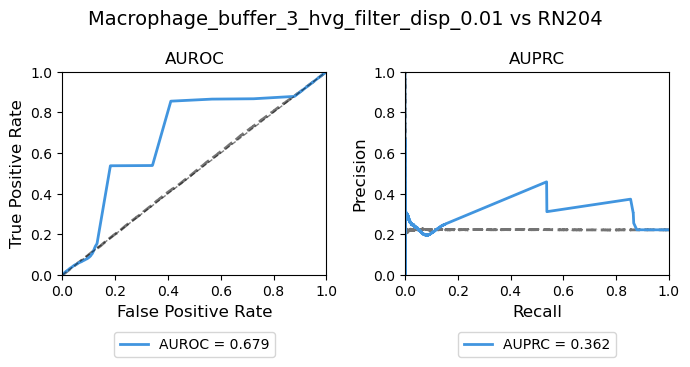

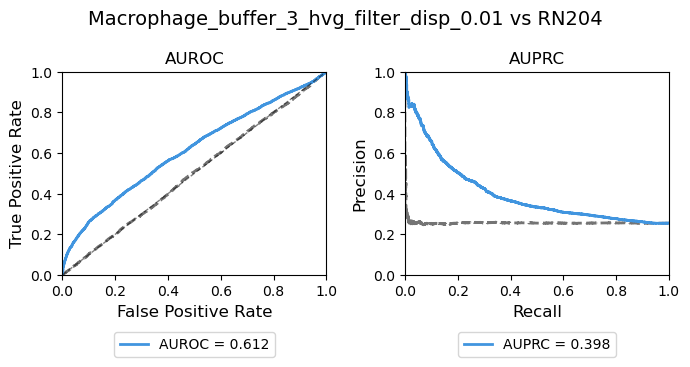

In [340]:
experiment_name = "Macrophage_buffer_3_hvg_filter_disp_0.01"
ground_truth_name = "RN204"
gt_df = gt_by_dataset_dict["macrophage"][ground_truth_name]

exp = experiment_loader.ExperimentLoader(
    experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
    experiment_name=experiment_name,
    model_num=1,
)

# gt_df = exp.load_ground_truth(ground_truth_file)
grad_df = exp.original_load_gradient_attribution_matrix()
new_grad_df = exp.load_gradient_attribution()
grad_df["Score_pooled"] = grad_df["Score"] 
fig, overlap_info_df = exp.plot_auroc_auprc(
    grad_df, 
    gt_df, 
    ground_truth_name=ground_truth_name, 
    return_overlap_info=True,
    balance_auroc=True,
    balance_auprc=False,
    use_abs_scores=False,
    )
fig.show()

fig, overlap_info_df = exp.plot_auroc_auprc(
    new_grad_df, 
    gt_df, 
    ground_truth_name=ground_truth_name, 
    return_overlap_info=True,
    balance_auroc=True,
    balance_auprc=False,
    use_abs_scores=False,
    )
fig.show()

fig_dir = os.path.join(exp.experiment_dir, exp.experiment_name, ground_truth_name)
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
auroc_fig_path = os.path.join(fig_dir, f"{ground_truth_name}_auroc_auprc.png")

fig.savefig(auroc_fig_path, dpi=300)
print(overlap_info_df)

In [ ]:
experiments = [
    "Macrophage_buffer_1_hvg_filter_disp_0.01",
    "Macrophage_buffer_2_hvg_filter_disp_0.01",
    "Macrophage_buffer_3_hvg_filter_disp_0.01",
    "Macrophage_buffer_4_hvg_filter_disp_0.01",
    "Macrophage_buffer_2_hvg_filter_none",
    "Macrophage_buffer_1_best_settings",
    "Macrophage_buffer_2_best_settings",
    "Macrophage_all_bnchmk_best_settings",
    "mESC_E7.5_rep1_hvg_filter_disp_0.01",
    "mESC_E7.5_rep1_hvg_filter_disp_0.5",
    "mESC_E7.5_rep2_hvg_filter_disp_0.01",
    "mESC_E7.5_rep2_hvg_filter_disp_0.5",
    "mESC_E8.5_rep1_hvg_filter_disp_0.01",
    "mESC_E8.5_rep1_hvg_filter_disp_0.5",
    "mESC_E8.5_rep2_hvg_filter_disp_0.01",
    "mESC_E8.5_rep2_hvg_filter_disp_0.5",
    "mESC_E8.5_rep2_hvg_filter_disp_0.5",
    "mESC_E7.5_rep1_best_settings",
    "mESC_E7.5_rep2_best_settings",
    "mESC_E8.5_rep1_best_settings",
    "K562_hvg_filter_disp_0.01",
    "K562_hvg_filter_disp_0.5",
    "K562_hvg_filter_none",
    "K562_sample_1_best_settings"
]

all_gt_results = []
for experiment_name in experiments:
    print(f"Processing experiment: {experiment_name}")
    if "macrophage" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["macrophage"]
        sample_type = "Macrophage"
    elif "mesc" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["mESC"]
        sample_type = "mESC"
    elif "k562" in experiment_name.lower():
        gt_dict = gt_by_dataset_dict["K562"]
        sample_type = "K562"
        
    exp = experiment_loader.ExperimentLoader(
        experiment_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments/",
        experiment_name=experiment_name,
        model_num=1,
    )

    grad_df = exp.load_gradient_attribution()
    orig_grad_df = exp.original_load_gradient_attribution_matrix()
    orig_grad_df["Score_pooled"] = orig_grad_df["Score"]
        
    for gt_name, gt_df in gt_dict.items():
        print(f"  - Processing ground truth: {gt_name}")
        fig, overlap_info_df = exp.plot_auroc_auprc(
            grad_df, 
            gt_df, 
            ground_truth_name=gt_name, 
            return_overlap_info=True,
            balance_auprc=True,
            use_abs_scores=False,
            no_fig=True,
            )
        fig, orig_overlap_info_df = exp.plot_auroc_auprc(
            orig_grad_df, 
            gt_df, 
            ground_truth_name=gt_name, 
            return_overlap_info=True,
            balance_auprc=True,
            use_abs_scores=False,
            no_fig=True,
            )

        results_dict = {
            "sample_type": sample_type,
            "experiment": experiment_name,
            "ground_truth": gt_name,
            "auroc": overlap_info_df.loc["TFs", "AUROC"],
            "original_auroc": orig_overlap_info_df.loc["TFs", "AUROC"],
            "auprc": overlap_info_df.loc["TFs", "AUPRC"],
            "original_auprc": orig_overlap_info_df.loc["TFs", "AUPRC"],
            "num_tf_in_gt": overlap_info_df.loc["TFs", "Overlap (Score DF in GT)"],
            "pct_tf_overlap": overlap_info_df.loc["TFs", "Pct of GRN in GT"],
            "pct_tg_overlap": overlap_info_df.loc["TGs", "Pct of GRN in GT"],
            "pct_edges_in_gt": overlap_info_df.loc["edges", "Pct of GRN in GT"],
            
        }

        results_df = pd.DataFrame(results_dict, index=[0])
        all_gt_results.append(results_df)
        
        # fig_dir = os.path.join(exp.experiment_dir, exp.experiment_name, gt_name)
        # if not os.path.exists(fig_dir):
        #     os.makedirs(fig_dir)
        # auroc_fig_path = os.path.join(fig_dir, f"{gt_name}_auroc_auprc.png")

        # fig.savefig(auroc_fig_path, dpi=300)
        # plt.close(fig)

full_results_df = pd.concat(all_gt_results, axis=0)
full_results_df


Processing experiment: Macrophage_buffer_1_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_2_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_3_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_4_hvg_filter_disp_0.01
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_2_hvg_filter_none
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_1_best_settings
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_buffer_2_best_settings
  - Processing ground truth: RN204
  - Processing ground truth: ChIP-Atlas
Processing experiment: Macrophage_all_bnchmk_b

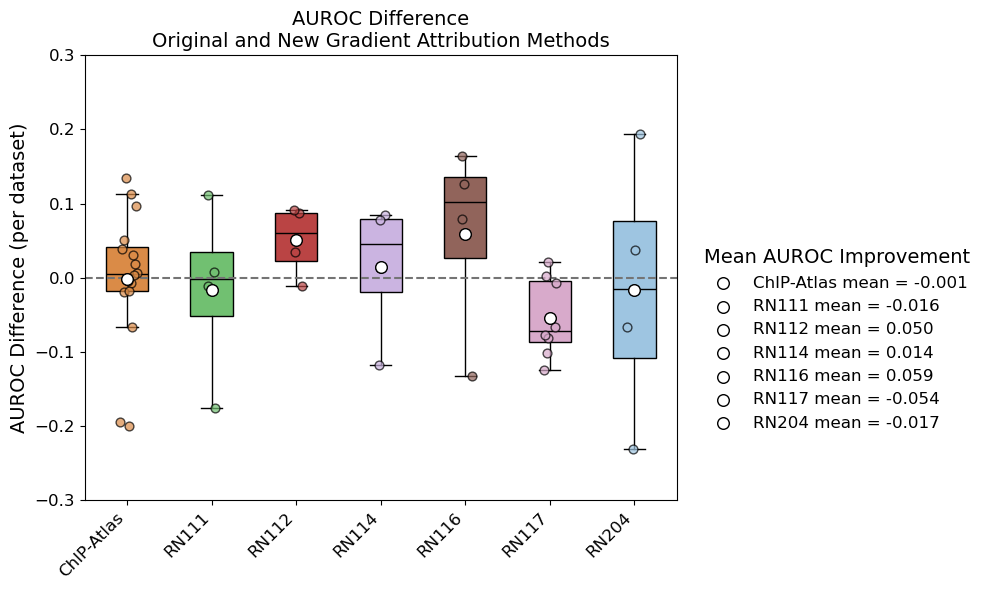

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import column

full_results_df["AUROC Improvement"] = (
    full_results_df["auroc"] - full_results_df["original_auroc"]
)

def plot_auroc_improvement_boxplot(
    full_results_df, 
    column="AUROC Improvement", 
    hbar_y=0
    ):
    # ---- group data by ground_truth ----
    groups = full_results_df.groupby("ground_truth")[column]
    labels = groups.groups.keys()
    data = [groups.get_group(g).values for g in labels]

    color_dict = {
        "ChIP-Atlas": "#da8b47",
        "RN111": "#71c071",
        "RN112": "#ba4444",
        "RN114": "#cbb4e1",
        "RN116": "#91645b",
        "RN117": "#d8aacb",
        "RN204": "#9ec5e1",
    }

    means = [np.mean(groups.get_group(g)) for g in labels]

    plt.figure(figsize=(10, 6))
    # ---- boxplot ----
    bp = plt.boxplot(
        data,
        patch_artist=True,
        showfliers=False,
        zorder=1,
    )

    plt.axhline(hbar_y, color="#747474", linestyle="--")


    # ---- color boxes ----
    for label, box in zip(labels, bp["boxes"]):
        box.set_facecolor(color_dict.get(label, "#4195df"))
    for median in bp["medians"]:
        median.set_color("black")

    # ---- scatter points ----
    for i, g in enumerate(labels, start=1):
        yvals = groups.get_group(g).values
        xvals = np.random.normal(i, 0.05, size=len(yvals))  # jitter per box
        
        plt.scatter(
            xvals,
            yvals,
            color=color_dict.get(g, "#4195df"),
            alpha=0.7,
            s=40,
            edgecolor="k",
            zorder=2
        )

    # ---- plot mean per ground_truth ----

    plt.scatter(
        range(1, len(means) + 1),
        means,
        color="white",
        s=60,
        edgecolor="k",
        zorder=3,
        label="Mean AUROC Improvement"
    )

    # ---- formatting ----
    plt.xticks(range(1, len(labels) + 1), labels, rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel(f"{column} (per dataset)", fontsize=14)
    plt.title(f"{column}\nOriginal and New Gradient Attribution Methods", fontsize=14)

    # ---- plot mean per ground_truth + build legend ----
    legend_handles = []

    for i, (g, m) in enumerate(zip(labels, means), start=1):
        h = plt.scatter(
            i,
            m,
            color="white",
            s=70,
            edgecolor="k",
            zorder=3,
            label=f"{g} mean = {m:.3f}"
        )
        legend_handles.append(h)


    plt.legend(
        handles=legend_handles,
        bbox_to_anchor=(1.02, 0.6),
        loc="upper left",
        frameon=False,
        fontsize=12,
        title="Mean AUROC Improvement",
        title_fontsize=14,
    )

    plt.ylim(-0.3, 0.3)
    plt.tight_layout()
    plt.show()


In [323]:
print(full_results_df[["auroc", "original_auroc"]].describe())

new_auroc_grouped_by_gt = full_results_df.groupby("ground_truth")["auroc"].mean()
print(new_auroc_grouped_by_gt.describe())

old_auroc_grouped_by_gt = full_results_df.groupby("ground_truth")["original_auroc"].mean()
print(old_auroc_grouped_by_gt.describe())


           auroc  original_auroc
count  44.000000       44.000000
mean    0.523538        0.525462
std     0.073874        0.056741
min     0.337747        0.419150
25%     0.481583        0.490967
50%     0.527699        0.517054
75%     0.572686        0.548280
max     0.685743        0.724330
count    7.000000
mean     0.528532
std      0.030624
min      0.479933
25%      0.512899
50%      0.526422
75%      0.549588
max      0.568395
Name: auroc, dtype: float64
count    7.000000
mean     0.523411
std      0.017906
min      0.504848
25%      0.509398
50%      0.522904
75%      0.530694
max      0.555944
Name: original_auroc, dtype: float64


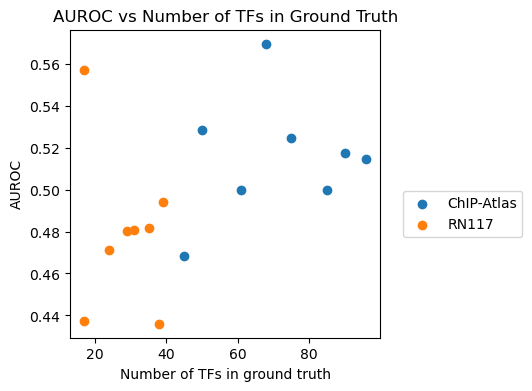

In [213]:
# Scatterplot of auroc vs percent of tf overlap in gt
plt.figure(figsize=(4,4))
df = full_results_df[full_results_df["sample_type"] == "K562"]
for gt_name in df["ground_truth"].unique():
    subset = df[df["ground_truth"] == gt_name]
    plt.scatter(subset["num_tf_in_gt"], subset["auroc"], label=gt_name)
plt.title("AUROC vs Number of TFs in Ground Truth")
plt.xlabel("Number of TFs in ground truth")
plt.ylabel("AUROC")
plt.legend(
    bbox_to_anchor=(1.05, 0.5), loc='upper left'
)
plt.show()

In [173]:
exp.load_eval_results()
results_df = exp.results_df[exp.results_df["method"] == "Gradient Attribution"]
results_df = results_df[["method", "gt", "auroc", "auprc"]]
results_df

,method,gt,auroc,auprc
14,Gradient Attribution,ChIP-Atlas,0.347903,0.394673
15,Gradient Attribution,RN204,0.334909,0.415797


In [97]:

exp.df_with_ground_truth.head()
ground_truth_df = exp.load_ground_truth(ground_truth_file)


print("----- SCORE DF  OVERLAP WITH GROUND TRUTH-----")
print(f"Total TFs in score df: {grad_df['Source'].nunique():,}")
print(f"Total TGs in score df: {grad_df['Target'].nunique():,}")
print(f"Total edges in score df: {len(grad_df):,}")
print()

num_true = exp.df_with_ground_truth["_in_gt"].sum()
num_false = len(exp.df_with_ground_truth) - num_true
print(f"Score TFs in ground truth: {exp.df_with_ground_truth['Source'].nunique():,}")
print(f"Score TGs in ground truth: {exp.df_with_ground_truth['Target'].nunique():,}")
print(f"Score edges in ground truth: {len(exp.df_with_ground_truth):,}")
print(f"  - True edges: {int(num_true):,}")
print(f"  - False edges: {int(num_false):,}")
print()


print("----- GROUND TRUTH OVERLAP WITH SCORE DF -----")
print(f'Total TFs in ground truth: {ground_truth_df["Source"].nunique():,}')
print(f'Total TGs in ground truth: {ground_truth_df["Target"].nunique():,}')
print(f'Total edges in ground truth: {len(ground_truth_df):,}')
print()

score_df_tfs = set(grad_df["Source"])
score_df_tgs = set(grad_df["Target"])
missing_df = ground_truth_df[~ground_truth_df["Source"].isin(score_df_tfs) & ~ground_truth_df["Target"].isin(score_df_tgs)].copy()
print(f"Ground truth TFs not in score df: {missing_df['Source'].nunique():,}")
print(f"Ground truth TGs not in score df: {missing_df['Target'].nunique():,}")
print(f"Ground truth edges not in score df: {len(missing_df):,}")
print()

----- SCORE DF  OVERLAP WITH GROUND TRUTH-----
Total TFs in score df: 277
Total TGs in score df: 3,585
Total edges in score df: 993,045

Score TFs in ground truth: 4
Score TGs in ground truth: 3,481
Score edges in ground truth: 27,848
  - True edges: 10,032
  - False edges: 17,816

----- GROUND TRUTH OVERLAP WITH SCORE DF -----
Total TFs in ground truth: 24
Total TGs in ground truth: 37,851
Total edges in ground truth: 2,500,303

Ground truth TFs not in score df: 20
Ground truth TGs not in score df: 34,267
Ground truth edges not in score df: 1,911,442



In [ ]:
tg_expr_pred_df, tg_expr_true_df = exp.run_forward_pass(num_batches=15)

predicted_expr = tg_expr_pred_df.copy()
predicted_expr["mean_expr"] = predicted_expr.mean(axis=1).values
predicted_expr["std_expr"] = predicted_expr.std(axis=1).values
predicted_expr = predicted_expr[["mean_expr", "std_expr"]]

true_expr = tg_expr_true_df
true_expr["mean_expr"] = true_expr.mean(axis=1).values
true_expr["std_expr"] = true_expr.std(axis=1).values
true_expr = true_expr[["mean_expr", "std_expr"]]

merged = predicted_expr.merge(
    true_expr,
    left_index=True,
    right_index=True,
    suffixes=("_pred", "_true")
)

merged["diff"] = merged["mean_expr_pred"] - merged["mean_expr_true"]

merged

,mean_expr_pred,std_expr_pred,mean_expr_true,std_expr_true,diff
1700025G04RIK,0.581790,0.140557,0.501269,0.033464,0.080521
1700034P13RIK,0.268288,0.052224,0.229964,0.006849,0.038323
CRACDL,0.003775,0.012771,0.008374,0.000495,-0.004599
2310009B15RIK,0.047540,0.013995,0.047998,0.000405,-0.000458
4930444P10RIK,0.009208,0.008202,0.013811,0.000299,-0.004603
...,...,...,...,...,...
WNT6,0.144629,0.074681,0.122165,0.019122,0.022464
XKR4,0.568969,0.133240,0.489097,0.126019,0.079872
XPR1,0.435321,0.101225,0.607469,0.083148,-0.172148
ZDBF2,0.389615,0.076216,0.420550,0.044066,-0.030936


0.8152525373815609


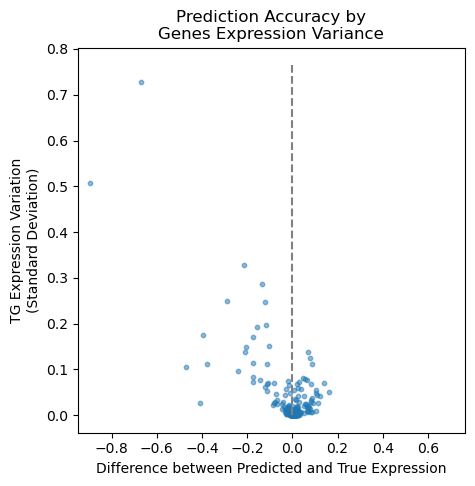

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.scatter(merged["diff"], merged["std_expr_true"], alpha=0.5, s=10)

lims = [
    np.min([plt.xlim()[0], plt.ylim()[0]]),  # min of both axes
    np.max([plt.xlim()[1], plt.ylim()[1]]),  # max of both axes
]
plt.vlines(x=0, ymin=0, ymax=lims[1], colors='grey', linestyles='dashed', label="Perfect Prediction")
plt.xlim(lims)
plt.title("Prediction Accuracy by\nGenes Expression Variance")
plt.xlabel("Difference between Predicted and True Expression")
plt.ylabel("TG Expression Variation\n(Standard Deviation)")
print(np.corrcoef(np.abs(merged["diff"]), merged["std_expr_true"])[0,1])

plt.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Range1d, ColumnDataSource, HoverTool

output_notebook()

# Make sure gene names are in a column (NOT just the pandas index)
merged2 = merged.reset_index().rename(columns={"index": "gene"})
merged2["diff"] = np.abs(merged2["diff"])
source = ColumnDataSource(merged2)

lo = float(min(merged2["mean_expr_pred"].min(), merged2["mean_expr_true"].min()))
hi = float(max(merged2["mean_expr_pred"].max(), merged2["mean_expr_true"].max()))

p = figure(
    width=400,
    height=400,
    tools="pan,wheel_zoom,reset",
    x_axis_label="Predicted TG Expression",
    y_axis_label="True TG Expression",
)

scatter_renderer = p.scatter(
    x="mean_expr_pred",
    y="mean_expr_true",
    source=source,
    size=6,
    alpha=0.7
)

# Add hover with your tooltips
hover = HoverTool(
    renderers=[scatter_renderer],   # <<< restrict hover here
    tooltips=[
        ("Gene", "@gene"),
        ("Pred", "@mean_expr_pred{0.000}"),
        ("True", "@mean_expr_true{0.000}"),
    ],
)
p.add_tools(hover)

p.line([lo, hi], [lo, hi])  # 1:1 line

pad = 0.15 * (hi - lo)
p.x_range = Range1d(lo, hi, bounds=(lo - pad, hi + pad))
p.y_range = Range1d(lo, hi, bounds=(lo - pad, hi + pad))

show(p)


Loading BokehJS ...